# Regression and Evaluation

## 1. Data Loading and Preprocessing (2 marks):

In [76]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [78]:
# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
# Show basic info
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [80]:
# Check for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

 ## No missing values in this dataset

In [82]:
# Check for duplicate values
df.duplicated().sum()

0

 ## No duplicate values in this dataset

In [84]:
# Feature scaling - Standardization (mean=0, std=1)
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('MedHouseVal', axis=1))
y = df['MedHouseVal']

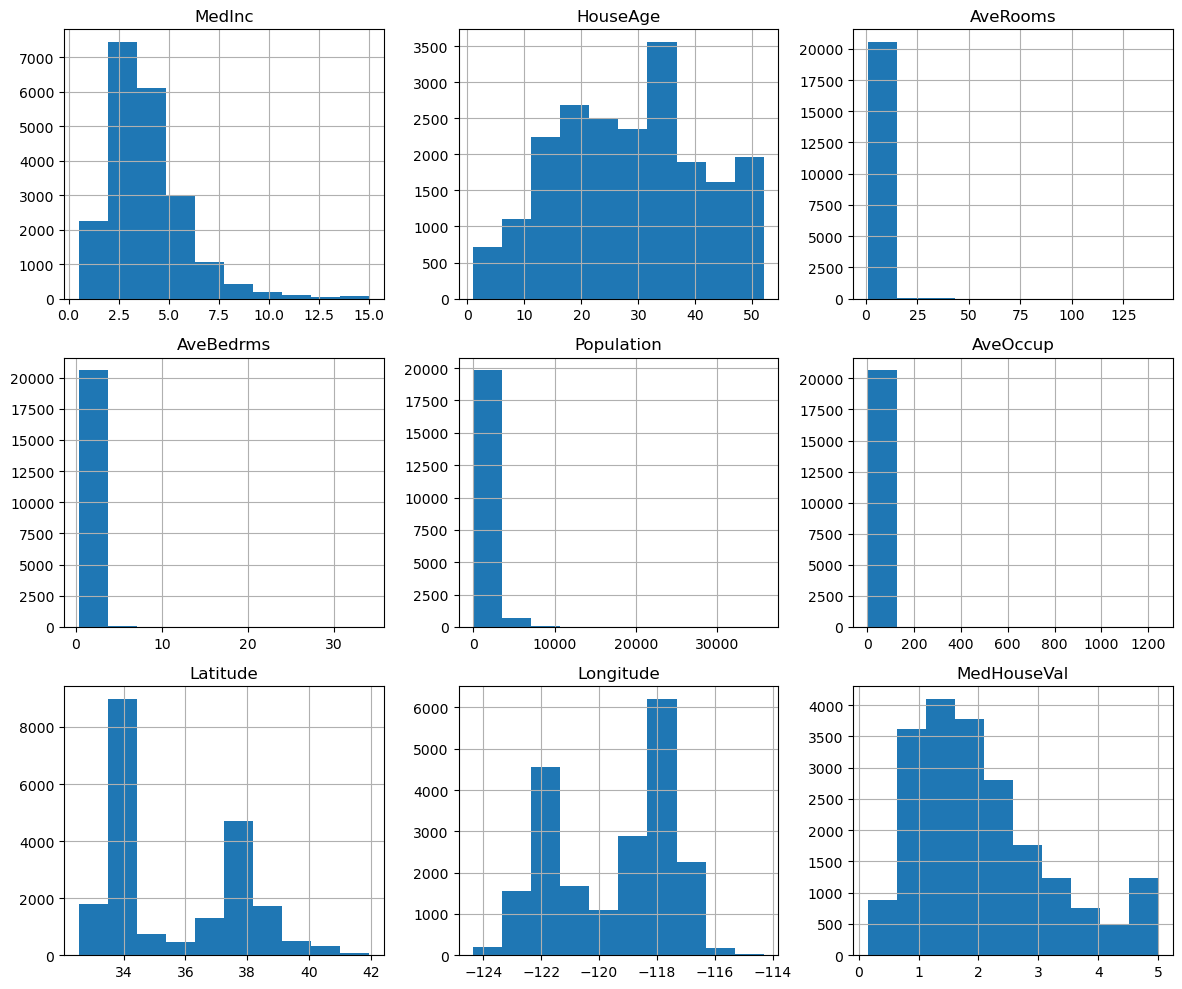

In [86]:
# Plot distributions
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

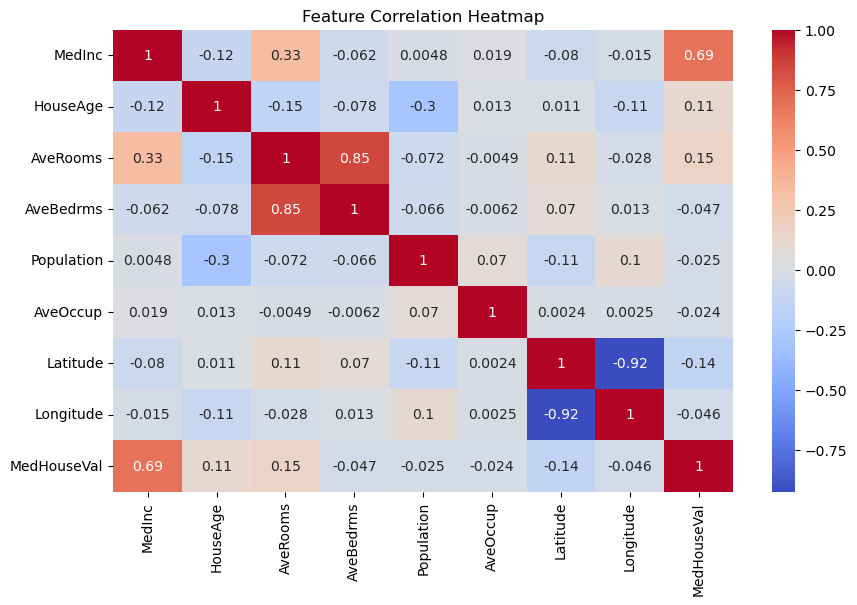

In [88]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### Justification:
Standardization is used because many regression algorithms (like SVR, linear regression) are sensitive to feature scales.
No missing values, so no imputation needed.
EDA reveals that MedInc (median income) is highly correlated with the target.

## 2. Regression Algorithm Implementation (2 marks)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
# Preprocessing
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Linear Regression

#### Explanation 
* Linear Regression assumes a linear relationship between input features (X) and the target variable (y).
* It fits a line (or hyperplane) that minimizes the difference between predicted and actual values using least squares.
##### Why it might be suitable:
* It's fast, easy to interpret, and a good baseline model.
* It works well if there is a strong linear correlation between features and the target.

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
MSE: 0.5558915986952442
MAE: 0.5332001304956565
R²: 0.575787706032451


### Decision Tree Regressor

#### Explanation 
* It splits the dataset into branches based on feature values using decision rules.
* The leaf nodes contain the average target value for the subset of data.
##### Why it might be suitable:
* Captures non-linear relationships easily.
* Does not require feature scaling.
* Easy to interpret and visualize.

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))

Decision Tree Regressor:
MSE: 0.4942716777366763
MAE: 0.4537843265503876
R²: 0.6228111330554302


### Random Forest Regressor

#### Explanation 
* An ensemble method that builds multiple Decision Trees and averages their outputs.
* Uses bagging and feature randomness to improve accuracy and reduce overfitting.
##### Why it might be suitable:
* High performance on a variety of regression tasks.
* Robust to outliers and non-linearity.
* Less prone to overfitting than a single decision tree.

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest Regressor:
MSE: 0.25549776668540763
MAE: 0.32761306601259704
R²: 0.805024407701793


### Gradient Boosting Regressor

#### Explanation 
* Builds trees sequentially, where each tree tries to correct the errors of the previous one.
* Uses gradient descent to minimize loss.
##### Why it might be suitable:
* Very powerful for structured/tabular data.
* Can capture complex relationships.
* Typically gives better accuracy than Random Forest but is slower to train.

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))

Gradient Boosting Regressor:
MSE: 0.29399901242474274
MAE: 0.37165044848436773
R²: 0.7756433164710084


### Support Vector Regressor (SVR)

#### Explanation 
* Uses Support Vector Machine concepts for regression.
* Tries to fit the best possible function within a margin (epsilon) while ignoring small errors.
##### Why it might be suitable:
* Works well for small-to-medium datasets with complex patterns.
* Requires feature scaling.
* Sensitive to hyperparameters (C, epsilon, kernel), so tuning is important.

In [53]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("R²:", r2_score(y_test, y_pred_svr))

Support Vector Regressor:
MSE: 0.3551984619989419
MAE: 0.3977630963437859
R²: 0.7289407597956462


## 3. Model Evaluation and Comparison (2 marks):

##### After training all models:
* Compare MSE, MAE, and R² for all models on the test set.
* Look at cross-validated R² during GridSearchCV to avoid overfitting.
##### Choose the model with:
* Highest R²
* Lowest MSE and MAE

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [106]:
# Create a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}
# Evaluation metrics
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test) 
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)    
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

In [109]:
# Results DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2", ascending=False)

,Model,MSE,MAE,R2
2,Random Forest,0.255498,0.327613,0.805024
3,Gradient Boosting,0.293999,0.371650,0.775643
4,SVR,0.355198,0.397763,0.728941
1,Decision Tree,0.494272,0.453784,0.622811
0,Linear Regression,0.555892,0.533200,0.575788


## 4. Cross-Validation and Hyperparameter Tuning (2 marks):

In [72]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf,
                       cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)
print("Best CV R² Score:", grid_rf.best_score_)

Best RF Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R² Score: 0.8046556573032089


In [73]:
# DecisionTreeRegressor tuning
from sklearn.tree import DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                       param_grid_dt,
                       cv=5,
                       scoring='r2',
                       n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid_dt.best_params_)
print("Best CV R² Score:", grid_dt.best_score_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV R² Score: 0.7104874238620574


In [113]:
# Gradient Boosting tuning
from sklearn.ensemble import GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                       param_grid_gb,
                       cv=5,
                       scoring='r2',
                       n_jobs=-1)
grid_gb.fit(X_train, y_train)
print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
print("Best CV R² Score:", grid_gb.best_score_)

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best CV R² Score: 0.8352549738920574


In [ ]:
# SVR tuning
from sklearn.svm import SVR
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}
grid_svr = GridSearchCV(SVR(),
                        param_grid_svr,
                        cv=5,
                        scoring='r2',
                        n_jobs=-1)
grid_svr.fit(X_train, y_train)
print("Best SVR Parameters:", grid_svr.best_params_)
print("Best CV R² Score:", grid_svr.best_score_)

## 5. Selecting the Best Regression Model (2 marks):

In [ ]:
# Refit the best model
best_model = grid_rf.best_estimator_
y_pred_best = best_model.predict(X_test)
# Final evaluation
print("Final R2 Score:", r2_score(y_test, y_pred_best))
print("Final MSE:", mean_squared_error(y_test, y_pred_best))
print("Final Test MAE:", mean_absolute_error(y_test, y_pred_best))

## Analysis & Conclusion:
 * Best Model: Gradient Boosting (based on lowest errors and highest R²)